In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

### Generate Dataset

In [2]:
x1 = np.random.uniform(low=-1.0, high=1.0, size=100)

print(x1.shape)
x1[0:10]

(100,)


array([ 0.76390799, -0.50195215, -0.09555971, -0.85695107,  0.61745038,
        0.61870285, -0.44646871, -0.87802805, -0.69464539, -0.91235353])

In [3]:
x2 = np.random.uniform(low=-1.0, high=1.0, size=100)

print(x2.shape)
x2[0:10]

(100,)


array([ 0.9973628 ,  0.32383555,  0.88984072,  0.39624054,  0.5105226 ,
        0.9257168 , -0.40392355,  0.78135938, -0.7813243 , -0.66091701])

In [4]:
y = 0.3 * x1 + 0.5 * x2 + 0.1

y = (y>0).astype('int')

print(y.shape)
y[0:10]

(100,)


array([1, 1, 1, 1, 1, 1, 0, 1, 0, 0])

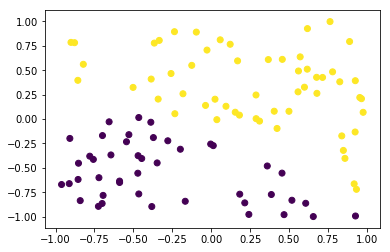

In [5]:
plt.scatter(x1, x2, c=y)

In [6]:
### Define Sigmoid

In [7]:
def sigmoid(n):
    return 1 / (1 + np.exp(-n))

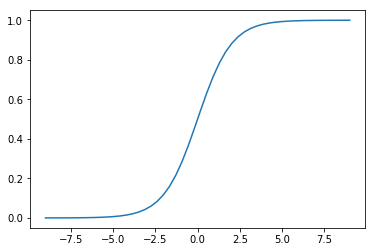

In [8]:
xx = np.linspace(start=-9, stop=+9)
yy = sigmoid(xx)

plt.plot(xx, yy)

### Gradient Descent

In [9]:
num_epoch = 100
learning_rate = 1.0

w1 = np.random.uniform(low=-1.0, high=1.0)
w2 = np.random.uniform(low=-1.0, high=1.0)
b = np.random.uniform(low=-1.0, high=1.0)

for epoch in range(num_epoch):
    y_predict = w1 * x1 + w2 * x2 + b
    y_predict = sigmoid(y_predict)
    
    predict = (y_predict >= 0.5).astype('int')
    accuracy = (predict == y).mean()
    
    
    if accuracy > 0.95:
        break
        
    if epoch % 10 == 0:
        print(f"{epoch:2} accuracy = {accuracy:.6f}")
        
    w1 = w1 - learning_rate * ((y_predict - y) * x1).mean()
    w2 = w2 - learning_rate * ((y_predict - y) * x2).mean()
    b = b - learning_rate * ((y_predict - y) * y).mean()
    
print('---' * 10)
print(f'{epoch:2} accuracy = {accuracy:.6f}')

 0 accuracy = 0.360000
10 accuracy = 0.730000
20 accuracy = 0.790000
30 accuracy = 0.870000
40 accuracy = 0.870000
50 accuracy = 0.890000
60 accuracy = 0.890000
70 accuracy = 0.890000
80 accuracy = 0.890000
90 accuracy = 0.890000
------------------------------
99 accuracy = 0.900000


In [10]:
import pandas as pd

y_predict = w1 * x1 + w2 * x2 + b
y_predict = sigmoid(y_predict)
y_predict = (y_predict >= 0.5).astype('int')

result = pd.DataFrame({'x1': x1, 'x2': x2, 'y(actual)': y, 'y(predict)': y_predict})

result

,x1,x2,y(actual),y(predict)
0,0.763908,0.997363,1,1
1,-0.501952,0.323836,1,1
2,-0.095560,0.889841,1,1
3,-0.856951,0.396241,1,1
4,0.617450,0.510523,1,1
5,0.618703,0.925717,1,1
6,-0.446469,-0.403924,0,0
7,-0.878028,0.781359,1,1
8,-0.694645,-0.781324,0,0
9,-0.912354,-0.660917,0,0
